# Problem: Titanic


# Dataset Description
The dataset is taken from the kaggle [website](https://www.kaggle.com/c/titanic/data) has been split into two groups:
1. training set (train.csv)
2. test set (test.csv)
    

- The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

- The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

- We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

##### **Variable Notes** accordint to the [Refrence](https://www.kaggle.com/c/titanic/data)

__pclass__: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

__age__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('titanic datasets\\train.csv', index_col='PassengerId')  ## We are also changing the Index to the "PassengerId" column
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(f"The Columns of the dataset are: \n\t{df.columns}")

The Columns of the dataset are: 
	Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Data Preprocessing
Let's check the data more:

In [6]:
df.isnull().sum() # To check for missing values

# Handle missing values (either by dropping or filling them with appropriate values)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Convert categorical data to numerical data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

Shuffling dataset to make it ready for the Splitting

In [7]:
# Shuffling the Dataset
df = df.sample(
    frac=1,
    random_state=10  ## To become able to reproduce a same result
)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
591,0,3,0,35.0,0,0,7.1250
132,0,3,0,20.0,0,0,7.0500
629,0,3,0,26.0,0,0,7.8958
196,1,1,1,58.0,0,0,146.5208
231,1,1,1,35.0,1,0,83.4750


Let's Split the dataset to Train and Test subsets. For this reason, we take something around 80% of the dataset as the Training set and the remaining as the test set.

In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


In the following we want to fit the model and then we will do th predictions

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.6703910614525139


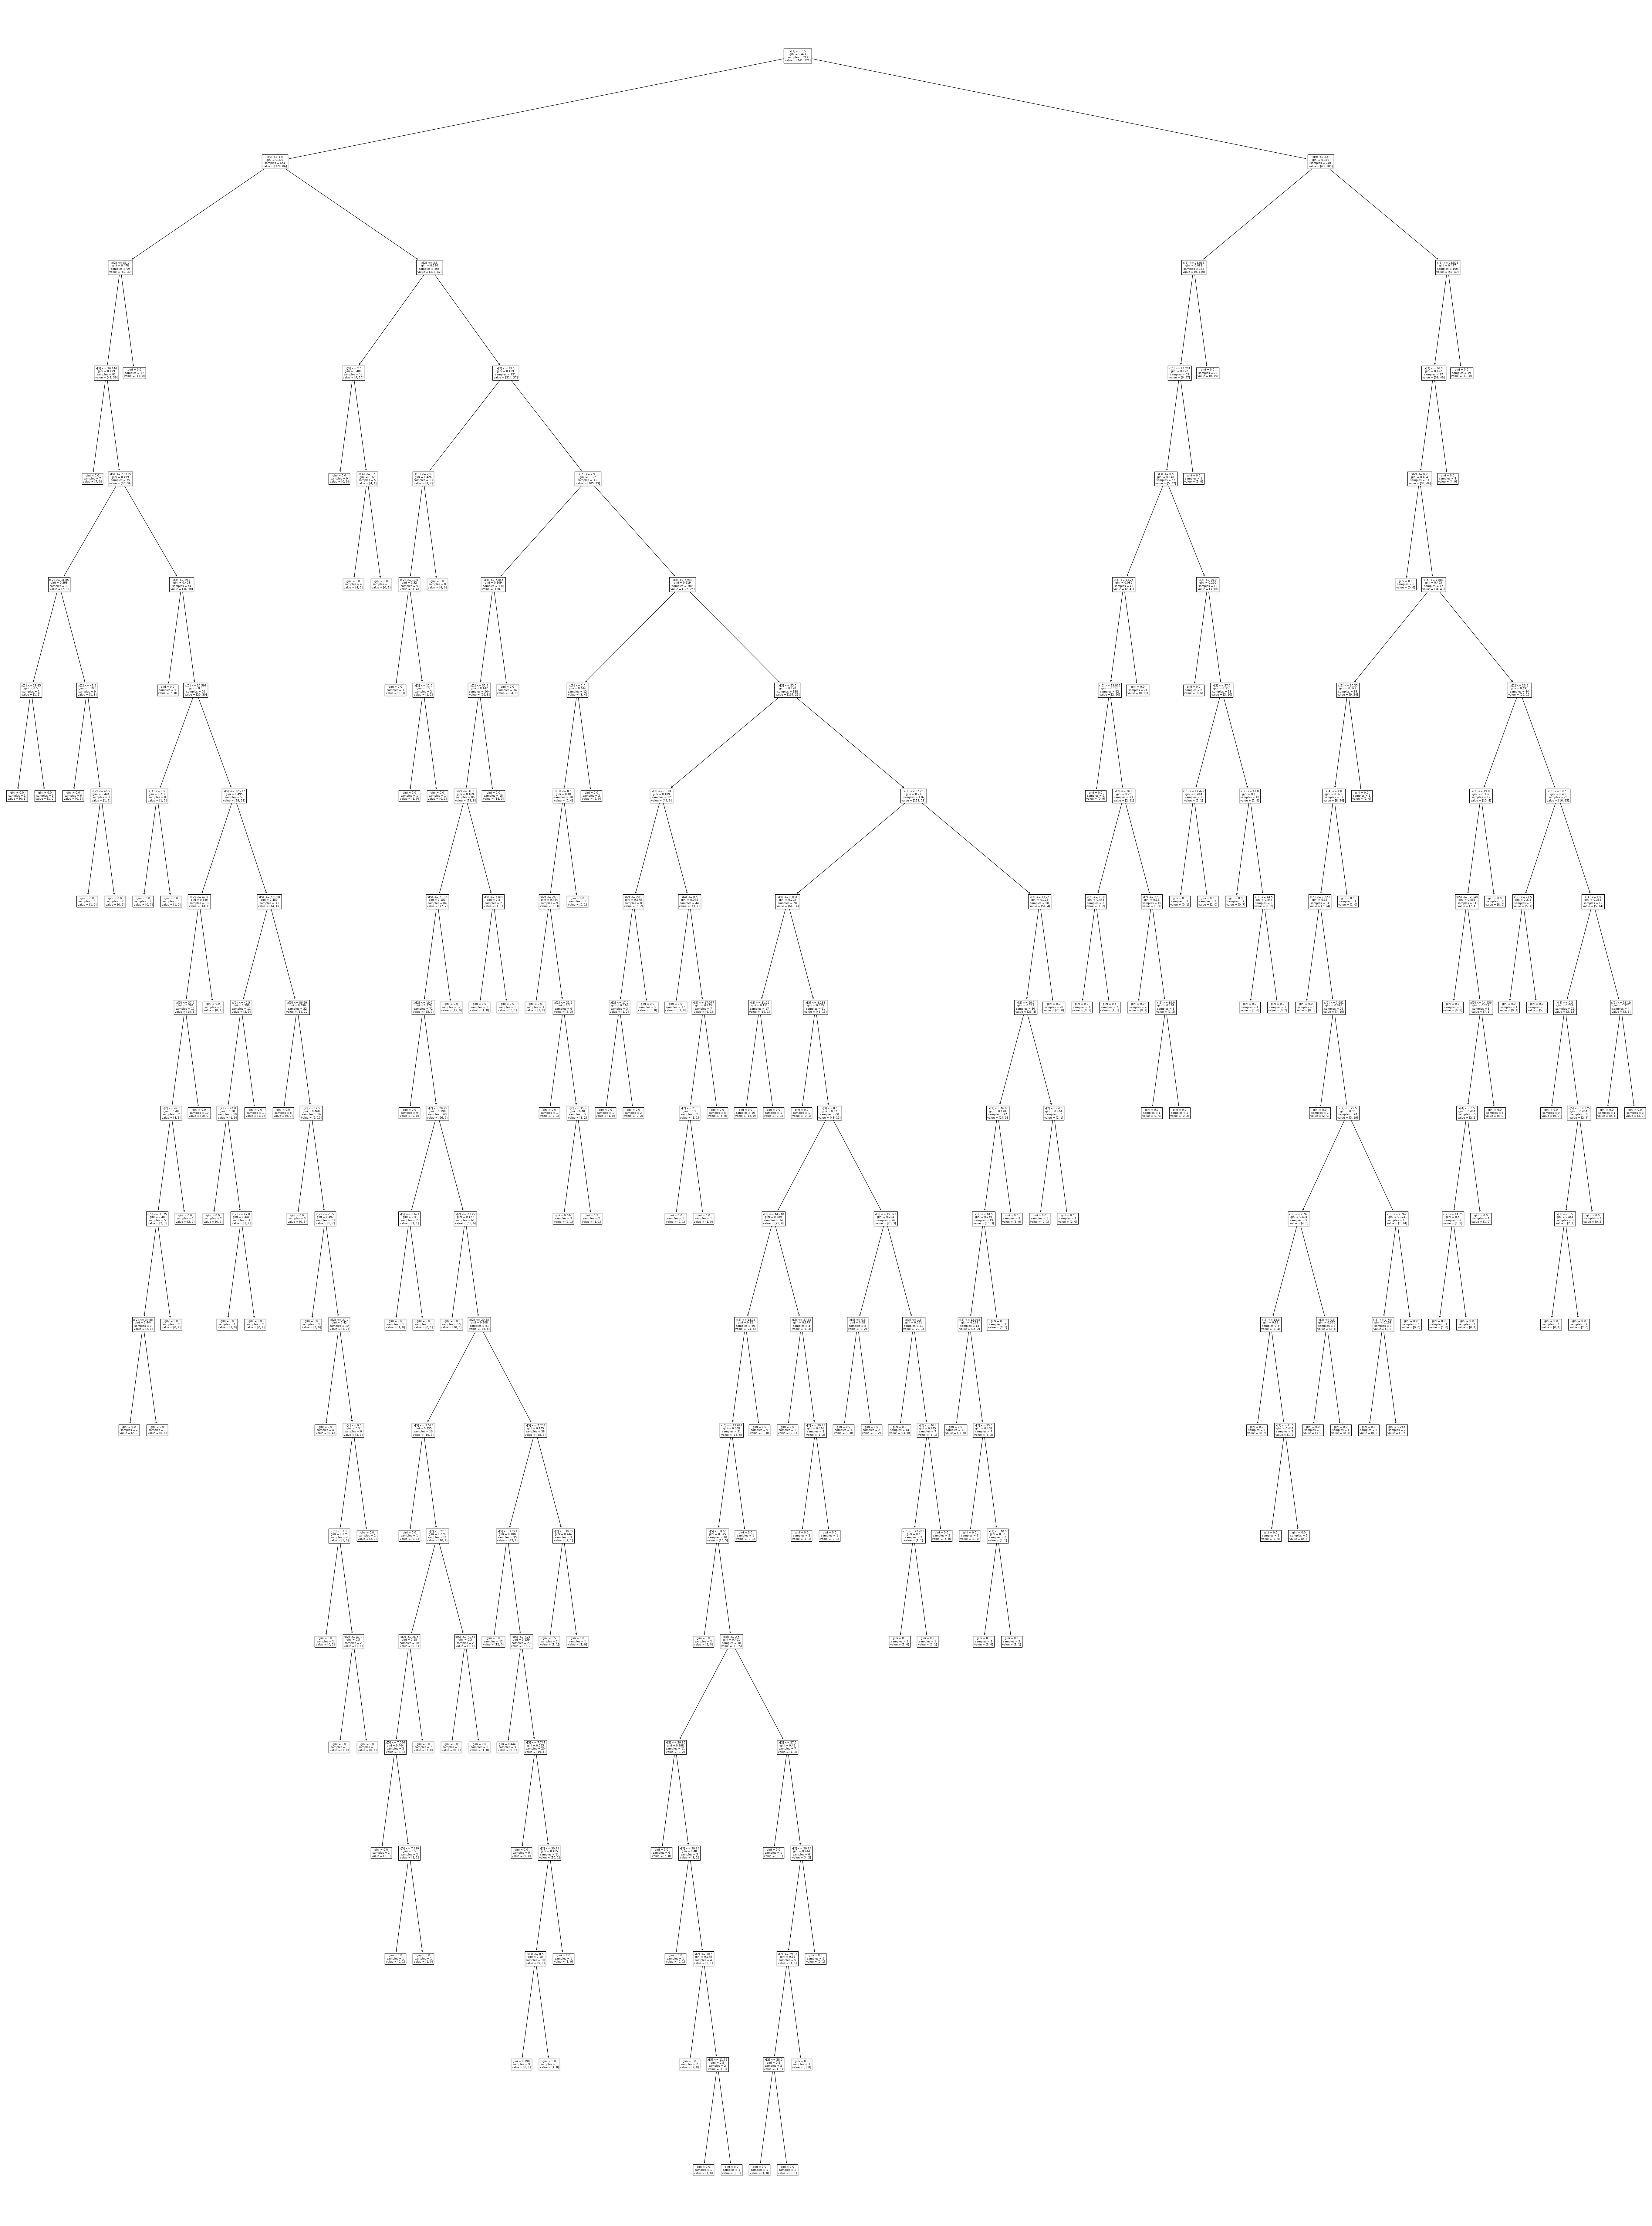

In [10]:
filled=True
feature_names = list(X_train.columns)
class_names = ['Surv', 'Unsurv']
rounded = True
proportion = True

fig = plt.figure(figsize=(70, 95))
plot_tree(model);
fig.savefig('titanic_fig.png')

In [11]:
print(export_text(model))  ## Showing the output with the Text tree

|--- feature_1 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_2 <= 53.00
|   |   |   |--- feature_5 <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  26.14
|   |   |   |   |--- feature_5 <= 27.14
|   |   |   |   |   |--- feature_2 <= 31.85
|   |   |   |   |   |   |--- feature_2 <= 28.85
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  28.85
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  31.85
|   |   |   |   |   |   |--- feature_2 <= 43.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  43.50
|   |   |   |   |   |   |   |--- feature_2 <= 46.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  46.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  27.14
|   |   |   |   |   |--- feature_5 <= 29.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  29.10
|   |   

Showing in other way using other libraries

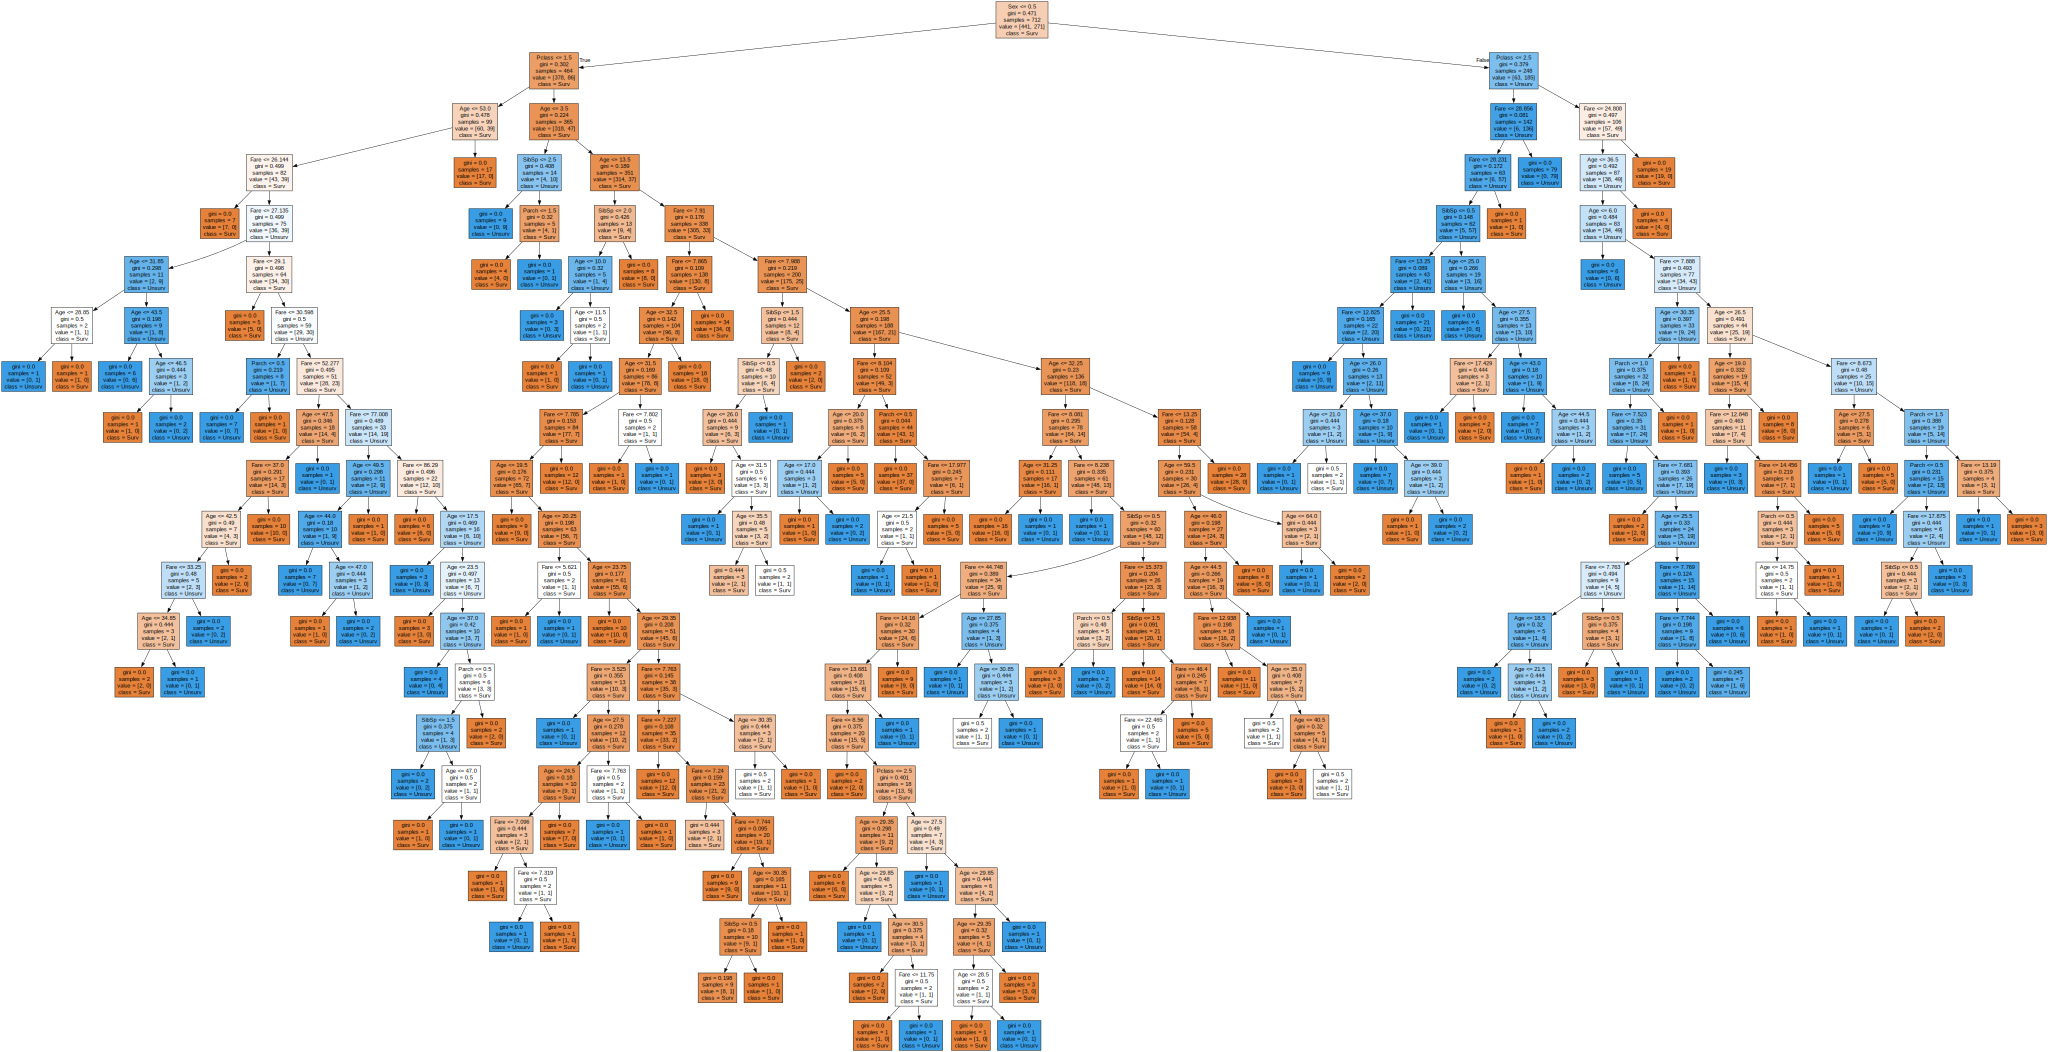

In [13]:
import graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=feature_names, 
                           class_names=class_names,
                           filled=filled)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph